# Unsupervised Learning

Notebook ini berisi praktik Unsupervised Learning yaitu proses klasterisasi menggunakan metode K-Means dan DBSCAN (Density-Based Spatial Clustering of Applications with Noise) pada library scikit learn.

Data yang digunakan adalah data bunga iris yang sudah tersedia pada library scikit learn. Dengan asumsi bahwa data bunga iris akan diolah untuk dikelompokkan menjadi beberapa klaster. Model yang dibuat nanti akan digunakan untuk mengelompokkan data baru.

## K-Means Clustering

In [1]:
# import libraries

from scipy.spatial.distance import cdist
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from matplotlib import pyplot
import pandas as pd
import numpy as np

In [2]:
# load data
data = load_iris()
features = data['data']

In [3]:
# create dataframe
df_iris = pd.DataFrame(features, 
                       columns=
                       ['sepallength', 'sepalwidth', 
                        'petallength', 'petalwidth'])

In [4]:
# only select column 'petallength' and 'petalwidth'
df_iris = df_iris[['petallength', 'petalwidth']]

In [5]:
# check on dataframe's shape
df_iris.shape

(150, 2)

In [6]:
df_iris.describe()

,petallength,petalwidth
count,150.000000,150.000000
mean,3.758000,1.199333
std,1.765298,0.762238
min,1.000000,0.100000
25%,1.600000,0.300000
50%,4.350000,1.300000
75%,5.100000,1.800000
max,6.900000,2.500000


In [7]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   petallength  150 non-null    float64
 1   petalwidth   150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


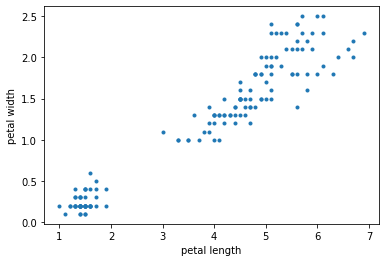

In [12]:
# visualization of data distribution

pyplot.plot(df_iris['petallength'],df_iris['petalwidth'],'.')
pyplot.xlabel('petal length')
pyplot.ylabel('petal width')
pyplot.show()

### Elbow Method

Dalam KMeans apabila bingung/kurang yakin untuk menentukan jumlah klaster yang diinginkan dapat menggunakan Elbow Method.
Elbow Method dapat dihitung dengan 'distortion' dan 'inertia'.
Distorsi adalah rata-rata jarak kuadrat euclidean dari pusat massa masing-masing cluster. Inersia adalah jumlah kuadrat jarak sampel ke pusat cluster terdekat.

referensi: https://towardsdatascience.com/clustering-with-k-means-1e07a8bfb7ca

In [16]:
# find the best n-cluster with elbow method using distortion and inertia
distortions = []
inertias = []
distortions_mapping = {}
inertias_mapping = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df_iris)
    kmeanModel.fit(df_iris)
  
    distortions.append(sum(np.min(cdist(df_iris, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df_iris.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    distortions_mapping[k] = sum(np.min(cdist(df_iris, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df_iris.shape[0]
    inertias_mapping[k] = kmeanModel.inertia_

In [17]:
# distortion values
for key, val in distortions_mapping.items():
    print(f'{key} : {val}')

1 : 1.707364436891335
2 : 0.583920126422277
3 : 0.36876646966749166
4 : 0.2998651974037013
5 : 0.26508349289751987
6 : 0.23357596529783659
7 : 0.2119667382225088
8 : 0.19577619564786694
9 : 0.1842857252575511


In [18]:
# inertia values
for key, val in inertias_mapping.items():
    print(f'{key} : {val}')

1 : 550.8953333333334
2 : 86.39021984551397
3 : 31.37135897435897
4 : 19.465989010989013
5 : 13.916908757908757
6 : 11.025145110250373
7 : 9.293371908030947
8 : 7.68028529657477
9 : 6.541584461432288


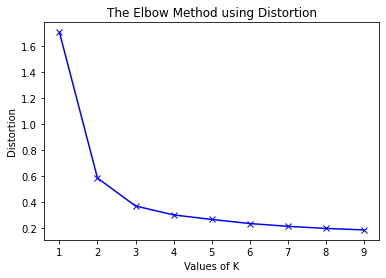

In [20]:
# visualize distortion values
pyplot.plot(K, distortions, 'bx-')
pyplot.xlabel('Values of K')
pyplot.ylabel('Distortion')
pyplot.title('The Elbow Method using Distortion')
pyplot.show()

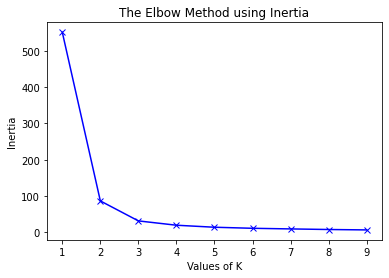

In [21]:
# visualize inertia values
pyplot.plot(K, inertias, 'bx-')
pyplot.xlabel('Values of K')
pyplot.ylabel('Inertia')
pyplot.title('The Elbow Method using Inertia')
pyplot.show()

### Create Kmeans Model

In [22]:
k_means = KMeans(n_clusters=3, max_iter=500)
k_means.fit(df_iris)

KMeans(max_iter=500, n_clusters=3)

In [23]:
k_means.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

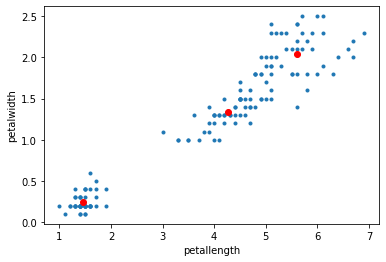

In [25]:
pyplot.figure()
pyplot.plot(df_iris['petallength'],df_iris['petalwidth'],'.')
pyplot.plot(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],
'or')
pyplot.xlabel("petallength")
pyplot.ylabel("petalwidth")
pyplot.show()

In [44]:
df_iris['cluster'] = k_means.fit_predict(df_iris)
df_iris

,petallength,petalwidth,cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


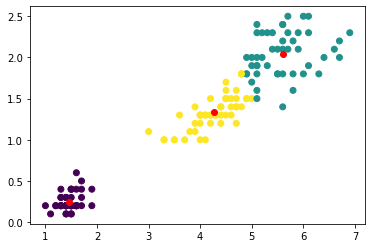

In [57]:
pyplot.figure()
pyplot.plot(k_means.cluster_centers_[:,0],
            k_means.cluster_centers_[:,1],
            'or')
pyplot.scatter(df_iris['petallength'], 
               df_iris['petalwidth'], 
               c=k_means.labels_.astype(float))
pyplot.show()

### Save and Load Model

Model yang sudah dibuat dapat disimpan untuk bisa digunakan pada deployment/production. Model disimpan menggunakan format pickle. Model yang disimpan berupa data binary.

In [1]:
import pickle

In [59]:
# save model
pickle.dump(k_means, open("iris_model.pickle", "wb"))
# wb = write binary

In [2]:
# load model
iris_model = pickle.load(open("iris_model.pickle", "rb"))
# rb = read binary

Mencari tahu apakah dapat melihat fitur/variabel/kolom yang digunakan dalam model yang sudah dibuat.

answer: https://stackoverflow.com/questions/55419654/is-it-possible-to-get-list-of-features-variables-used-in-model-after-saving-mode

In [17]:
# get parameters of the model
iris_model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 500,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [22]:
dir(iris_model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_algorithm',
 '_check_feature_names',
 '_check_mkl_vcomp',
 '_check_n_features',
 '_check_params',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_init_centroids',
 '_more_tags',
 '_n_init',
 '_n_threads',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tol',
 '_transform',
 '_validate_center_shape',
 '_validate_data',
 'algorithm',
 'cluster_centers_',
 'copy_x',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inertia_',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_features_in_',
 'n_init',
 'n_iter_',
 'predict',
 'random_

In [33]:
iris_model._get_tags()

{'non_deterministic': False,
 'requires_positive_X': False,
 'requires_positive_y': False,
 'X_types': ['2darray'],
 'poor_score': False,
 'no_validation': False,
 'multioutput': False,
 'allow_nan': False,
 'stateless': False,
 'multilabel': False,
 '_skip_test': False,
 '_xfail_checks': {'check_sample_weights_invariance': 'zero sample_weight is not equivalent to removing samples'},
 'multioutput_only': False,
 'binary_only': False,
 'requires_fit': True,
 'preserves_dtype': [],
 'requires_y': False,
 'pairwise': False}

In [35]:
iris_model._more_tags()

{'_xfail_checks': {'check_sample_weights_invariance': 'zero sample_weight is not equivalent to removing samples'}}

In [36]:
iris_model._get_param_names()

['algorithm',
 'copy_x',
 'init',
 'max_iter',
 'n_clusters',
 'n_init',
 'random_state',
 'tol',
 'verbose']

### Clustering new samples of data

In [4]:
# create new samples of data then turns into DataFrame
x1 = [1.0, 1.6, 2.9, 3.9]
x2 = [0.7, 1.2, 1.5, 2.0]

df = pd.DataFrame(list(zip(x1, x2)), 
                  columns=['petallength', 'petalwidth'])

In [5]:
df

,petallength,petalwidth
0,1.0,0.7
1,1.6,1.2
2,2.9,1.5
3,3.9,2.0


In [6]:
# cluster new data with loaded model
results = iris_model.fit_predict(df)

In [7]:
df['cluster'] = results

In [8]:
df

,petallength,petalwidth,cluster
0,1.0,0.7,0
1,1.6,1.2,0
2,2.9,1.5,2
3,3.9,2.0,1


jika nama kolom tidak ada, apakah model masih tetap akan bekerja?

In [9]:
df2 = pd.DataFrame(list(zip(x1, x2)))

In [10]:
df2

,0,1
0,1.0,0.7
1,1.6,1.2
2,2.9,1.5
3,3.9,2.0


In [12]:
results = iris_model.fit_predict(df2)

In [13]:
df2['cluster']=results
df2

,0,1,cluster
0,1.0,0.7,0
1,1.6,1.2,0
2,2.9,1.5,2
3,3.9,2.0,1


## DBSCAN

In [88]:
from sklearn.cluster import DBSCAN

In [118]:
# create a dbscan model by changing some parameters whose values are default
dbscan_model = DBSCAN(eps=0.6, min_samples=13, algorithm='brute')
dbscan_model.fit(df_iris)

DBSCAN(algorithm='brute', eps=0.6, min_samples=13)

In [119]:
unique_labels = set(dbscan_model.labels_)
colors = [pyplot.cm.Spectral(each) for each in [0.1, 0.3, 0.5, 0.7]]

In [98]:
dbscan_model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1, -1,  1,  1,  1,  2,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  2,
        2, -1,  2, -1,  1, -1, -1, -1,  2,  2,  2,  2, -1,  2,  2, -1, -1,
        1,  2,  2, -1,  2,  2, -1,  1,  2,  2, -1, -1, -1,  2, -1, -1, -1,
        2,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

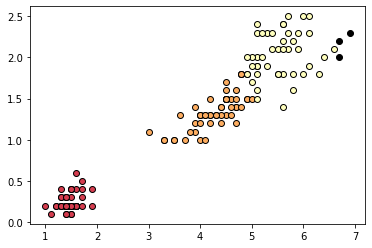

In [121]:
# coloring each data labels based on its cluster

for i in range(len(df_iris)):
    if dbscan_model.labels_[i]==-1:
        color = 'k'
    else:
        color = colors[dbscan_model.labels_[i]]
        
    pyplot.plot(df_iris['petallength'][i],df_iris['petalwidth'][i], marker='o',
                markerfacecolor=color,
                markeredgecolor='k')
pyplot.show()
